<a href="https://colab.research.google.com/github/Binoy-07/MLL-project/blob/main/MLL_project_2207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imbalanced-learn

Dataset loaded successfully.
--------------------------------------------------
Original Training data Churn count (1/Yes): 1496 (0.27% of total)
--------------------------------------------------
Features have been scaled (StandardScaler applied).


/tmp/ipython-input-3067463764.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


--------------------------------------------------
SMOTE applied to Training Data:
Balanced training sample size: 8276 samples
New Churn (1) count: 4138
New No Churn (0) count: 4138
--------------------------------------------------
Model trained successfully on balanced data (SMOTE).

--- Model Performance on UNSEEN Test Data ---
Accuracy Score: 0.7551

Classification Report (Focus on F1-Score, Precision, Recall for Churn=1):
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



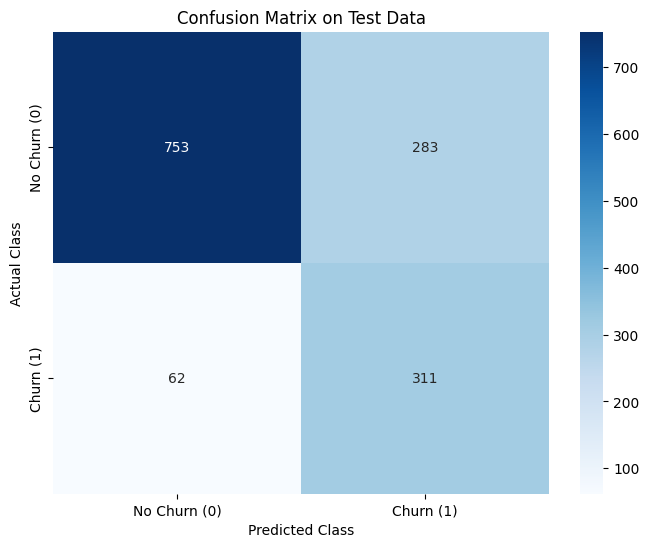

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Class Imbalance হ্যান্ডেল করার জন্য imblearn লাইব্রেরি ইম্পোর্ট করা হলো
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ডেটা সেট লোড করা
# ধরে নেওয়া হচ্ছে 'WA_Fn-UseC_-Telco-Customer-Churn.csv' ফাইলটি একই ফোল্ডারে আছে।
# এই ফাইলটি Kaggle লিংক থেকে ডাউনলোড করা যায়: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLL project 2207/Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' file not found.")
    print("অনুগ্রহ করে সঠিক ফাইল নাম দিন বা ফাইলটি আপলোড করুন।")
    exit()

# --- ১. ডেটা প্রিপ্রসেসিং ও ক্লিনজিং ---

# 'customerID' কলামটি বাদ দেওয়া হচ্ছে, কারণ এটি মডেল ট্রেনিং-এর জন্য অপ্রয়োজনীয়।
df.drop('customerID', axis=1, inplace=True)

# 'TotalCharges' কলামটি সংখ্যাবাচক (numeric) নয়, এটিকে সংখ্যায় রূপান্তর করা হচ্ছে।
# এখানে কিছু ফাঁকা (space) ভ্যালু আছে, সেগুলোকে NaN (Not a Number)-এ পরিবর্তন করা হচ্ছে।
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# TotalCharges-এর অনুপস্থিত (NaN) ভ্যালুগুলো গড় (mean) মান দিয়ে পূরণ করা হচ্ছে।
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# টার্গেট ভ্যারিয়েবল 'Churn'-কে সংখ্যায় রূপান্তর করা (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ক্যাটেগরিক্যাল ভ্যারিয়েবলগুলোর জন্য One-Hot Encoding ব্যবহার করা
# 'TotalCharges' বাদে সব নন-নিউমেরিক কলাম এনকোড করা হবে।
df = pd.get_dummies(df, drop_first=True)

# --- ২. ফিচার এবং টার্গেট আলাদা করা ---

# Churn হলো টার্গেট ভ্যারিয়েবল
X = df.drop('Churn', axis=1)
y = df['Churn']

# --- ৩. ট্রেন-টেস্ট স্প্লিট ---

# ডেটাকে ৮০% ট্রেনিং এবং ২০% টেস্টিং সেটে ভাগ করা
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("-" * 50)
print(f"Original Training data Churn count (1/Yes): {y_train.sum()} ({y_train.mean():.2f}% of total)")
print("-" * 50)

# --- ৪. ফিচার স্কেলিং ---

# Logistic Regression-এর জন্য সংখ্যাবাচক কলামগুলো স্কেলিং করা আবশ্যক।
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been scaled (StandardScaler applied).")

# --- ৫. SMOTE ব্যবহার করে ডেটা ব্যালেন্স করা (Imbalance Handling) ---

# SMOTE শুধুমাত্র ট্রেনিং ডেটার উপর প্রয়োগ করতে হবে
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

print("-" * 50)
print("SMOTE applied to Training Data:")
# SMOTE প্রয়োগের পরে Churn-এর সংখ্যা দেখা হচ্ছে। এটি এখন No Churn-এর প্রায় সমান হবে।
print(f"Balanced training sample size: {X_train_balanced.shape[0]} samples")
print(f"New Churn (1) count: {y_train_balanced.sum()}")
print(f"New No Churn (0) count: {y_train_balanced.shape[0] - y_train_balanced.sum()}")
print("-" * 50)

# --- ৬. মডেল তৈরি এবং প্রশিক্ষণ ---

# Logistic Regression মডেল তৈরি করা
model = LogisticRegression(random_state=42)
# মডেলটি ভারসাম্যপূর্ণ ডেটাসেটে প্রশিক্ষণ দেওয়া হলো
model.fit(X_train_balanced, y_train_balanced)

print("Model trained successfully on balanced data (SMOTE).")

# --- ৭. মডেলের পারফরম্যান্স মূল্যায়ন ---

# টেস্টিং ডেটার উপর প্রেডিকশন করা হচ্ছে (যা ভারসাম্যহীন আছে)
y_pred = model.predict(X_test_scaled)

# মেট্রিকস গণনা করা
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\n--- Model Performance on UNSEEN Test Data ---")
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report (Focus on F1-Score, Precision, Recall for Churn=1):")
print(class_report)

# কনফিউশন ম্যাট্রিক্সের ভিজ্যুয়ালাইজেশন
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

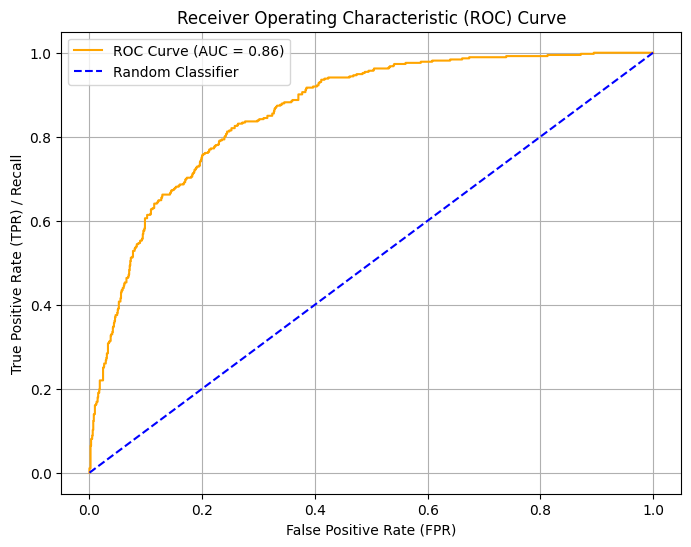

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

# --- ROC Curve ডেটা তৈরি করা ---

# টেস্টিং ডেটার উপর প্রেডিকশনের সম্ভাবনা (Probability) গণনা করা
# আমরা ক্লাসিফিকেশনের পরিবর্তে সম্ভাবনার মান ব্যবহার করব।
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve এর জন্য প্রয়োজনীয় মান (False Positive Rate, True Positive Rate) গণনা করা
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC (Area Under the Curve) Score গণনা করা
auc_score = roc_auc_score(y_test, y_pred_proba)

# --- ROC Curve আঁকা ---

plt.figure(figsize=(8, 6))
# ROC Curve প্লট করা
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc_score:.2f})')
# র্যান্ডম ক্লাসিফায়ারের বেসলাইন (রেফারেন্স লাইন)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate (FPR)') # ভুল করে No Churn কে Churn বলা
plt.ylabel('True Positive Rate (TPR) / Recall') # সঠিক Churn প্রেডিক্ট করা
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

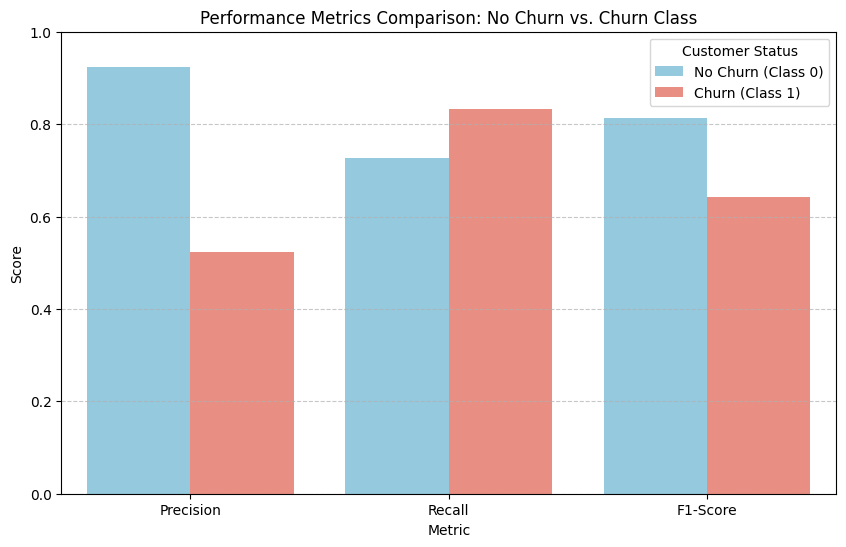


সাইড-বাই-সাইড বার গ্রাফ তৈরি হয়েছে।
এই গ্রাফটি Churn (লাল) এবং No Churn (নীল)-এর জন্য Precision, Recall এবং F1-Score-এর তুলনা দেখায়।


In [5]:
# --- ৮. পারফরম্যান্স মেট্রিকস-এর ভিজ্যুয়ালাইজেশন ---

# Classification Report থেকে ডেটা পার্স করা হচ্ছে
# এই ধাপটি class_report (যা একটি স্ট্রিং) থেকে মেট্রিকসগুলো আলাদা করে।
report_data = classification_report(y_test, y_pred, output_dict=True)

# 'No Churn' (0) এবং 'Churn' (1) ক্লাসের জন্য মেট্রিকসগুলো আলাদা করা
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'No Churn (Class 0)': [report_data['0']['precision'], report_data['0']['recall'], report_data['0']['f1-score']],
    'Churn (Class 1)': [report_data['1']['precision'], report_data['1']['recall'], report_data['1']['f1-score']]
}

metrics_df = pd.DataFrame(metrics_data)

# গ্রাফ তৈরির জন্য ডেটা ফরম্যাট পরিবর্তন করা (Melting the DataFrame)
metrics_melted = metrics_df.melt('Metric', var_name='Class', value_name='Score')

# সাইড-বাই-সাইড বার প্লট তৈরি করা
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_melted, palette=['skyblue', 'salmon']) # কালার সেট করা হলো

# গ্রাফের লেবেল ও টাইটেল সেট করা
plt.title('Performance Metrics Comparison: No Churn vs. Churn Class')
plt.ylabel('Score')
plt.ylim(0, 1.0) # Y-অক্ষ 0 থেকে 1.0 পর্যন্ত সেট করা হলো
plt.legend(title='Customer Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nসাইড-বাই-সাইড বার গ্রাফ তৈরি হয়েছে।")
print("এই গ্রাফটি Churn (লাল) এবং No Churn (নীল)-এর জন্য Precision, Recall এবং F1-Score-এর তুলনা দেখায়।")


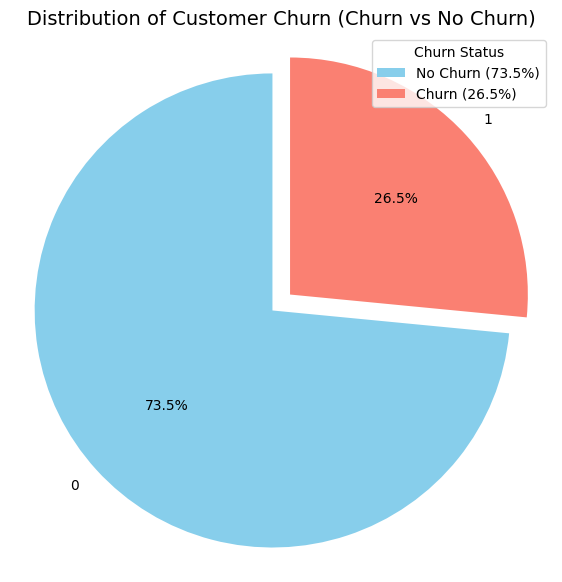


Churn Class Distribution:
Total Customers: 7043
No Churn: 5174 (73.5%)
Churn: 1869 (26.5%)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ধরে নিচ্ছি আপনার ডেটাসেটটি 'df' নামে লোড করা আছে।
# যদি আপনি CSV থেকে লোড না করে থাকেন, তবে df = pd.read_csv('your_telco_churn_file.csv') লাইনটি ব্যবহার করুন।

# যদি ডেটা লোড না থাকে, এই লাইনটি ব্যবহার করুন (আপনার ফাইলের নাম দিন):
# df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Churn ক্লাসের গণনা ---
churn_counts = df['Churn'].value_counts()
total_samples = churn_counts.sum()

# অনুপাত (% ) গণনা করা
churn_ratios = churn_counts / total_samples * 100

# --- Pie Chart তৈরি করা ---
plt.figure(figsize=(7, 7))
plt.pie(
    churn_ratios,
    labels=churn_ratios.index,
    autopct='%1.1f%%', # পার্সেন্টেজ ফরম্যাট (যেমন: 73.5%)
    startangle=90,
    colors=['skyblue', 'salmon'], # No (নীল) এবং Yes (লাল) এর জন্য কালার
    explode=[0, 0.1] # Churn (Yes) অংশটিকে সামান্য আলাদা করে দেখানোর জন্য
)

plt.title('Distribution of Customer Churn (Churn vs No Churn)', fontsize=14)
plt.legend(title="Churn Status", labels=[f'No Churn ({churn_ratios[0]:.1f}%)', f'Churn ({churn_ratios[1]:.1f}%)'], loc="upper right")
plt.axis('equal') # পাই চার্টটিকে বৃত্তাকার রাখার জন্য
plt.show()

# --- আউটপুট দেখানোর জন্য প্রিন্ট করা (ঐচ্ছিক) ---
print("\nChurn Class Distribution:")
print(f"Total Customers: {total_samples}")
print(f"No Churn: {churn_counts[0]} ({churn_ratios[0]:.1f}%)")
print(f"Churn: {churn_counts[1]} ({churn_ratios[1]:.1f}%)")

# এই আউটপুটটি সাধারণত দেখাবে যে Churn (Yes) হলো প্রায় 26-27% এবং No Churn (No) হলো প্রায় 73-74%।
# এটিই হলো আপনার ডেটা ইমব্যালেন্সের প্রমাণ।

In [7]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.5 MB/s eta 0:00:00


In [8]:
!pip install pyngrok

In [9]:
# আপনার ngrok টোকেন এখানে দিন
!ngrok authtoken 34O1Sy7oLgZ0dgl7Qz6SAWdOEye_7FSSfRy5SPmDDuQLdzK6g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok config add-authtoken 34O1Sy7oLgZ0dgl7Qz6SAWdOEye_7FSSfRy5SPmDDuQLdzK6g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [10]:
!ngrok http 80

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/ngrok.py", line 634, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/ngrok.py", line 622, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/process.py", line 312, in run_process
    subprocess.call(start)
  File "/usr/lib/python3.12/subprocess.py", line 391, in call
    return p.wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(s

In [ ]:
!--pooling-enabled

/bin/bash: --: invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--pretty-print
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


In [11]:
%%writefile churn_app.py
# আপনার Streamlit কোড এখানে থাকবে...
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# --- ১. মডেল এবং প্রিপ্রসেসিং টুলস লোড করা ---
# ধরে নেওয়া হলো ফাইলগুলো একই ডিরেক্টরিতে আছে
try:
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('logistic_regression_model.pkl')
    # এনকোডিং-এর পর ট্রেনিং ডেটা থেকে প্রাপ্ত কলামগুলির তালিকা
    encoded_features = joblib.load('encoded_features.pkl')
except FileNotFoundError:
    st.error("Error loading model files! Ensure 'scaler.pkl', 'logistic_regression_model.pkl', and 'encoded_features.pkl' are available.")
    st.stop()

# --- ২. অ্যাপ্লিকেশনের কনফিগারেশন ---
st.set_page_config(page_title="Telco Churn Prediction", layout="wide")
st.title("📞 Customer Churn Prediction App")
st.markdown("### 📊 Logistic Regression Model with SMOTE-Balanced Data")
st.markdown("---")


# --- ৩. ইনপুট ফাংশন: ব্যবহারকারীর কাছ থেকে ডেটা নেওয়া ---

def user_input_features():
    st.sidebar.header('Input Customer Data')

    # নিউমেরিক্যাল ফিচার্স (Sliders)
    tenure = st.sidebar.slider('Tenure (Months)', 0, 72, 24)
    monthly_charges = st.sidebar.slider('Monthly Charges ($)', 18.0, 118.0, 50.0)

    # ক্যাটেগরিক্যাল ফিচার্স (Select Boxes)
    gender = st.sidebar.selectbox('Gender', ('Male', 'Female'))
    partner = st.sidebar.selectbox('Partner Status', ('Yes', 'No'))
    dependents = st.sidebar.selectbox('Dependents', ('Yes', 'No'))

    # সার্ভিস ও কন্ট্রাক্ট
    contract = st.sidebar.selectbox('Contract Type', ('Month-to-month', 'One year', 'Two year'))
    internet_service = st.sidebar.selectbox('Internet Service', ('DSL', 'Fiber optic', 'No'))
    payment_method = st.sidebar.selectbox('Payment Method', ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'))

    # Final data dictionary
    data = {'gender': gender,
            'Partner': partner,
            'Dependents': dependents,
            'tenure': tenure,
            'InternetService': internet_service,
            'Contract': contract,
            'MonthlyCharges': monthly_charges,
            'PaymentMethod': payment_method,
            # অন্যান্য গুরুত্বপূর্ণ কলাম যোগ করুন, যেমন 'SeniorCitizen', 'MultipleLines', ইত্যাদি
           }

    features = pd.DataFrame(data, index=[0])
    return features

# ব্যবহারকারীর ইনপুট সংগ্রহ
input_df = user_input_features()

# --- ৪. ইনপুট প্রিপ্রসেসিং (মডেল ফরম্যাটে আনা) ---

# সমস্ত ইনপুটকে একটি ডেটাফ্রেম হিসেবে দেখানো
st.subheader('User Input Features')
st.write(input_df)

# ক্যাটেগরিক্যাল কলামগুলির One-Hot Encoding করা
# নোট: Telco ডেটাসেটে 'Yes'/'No' ধরনের অনেক কলাম আছে। এখানে শুধু দেখানো ফিচারগুলো এনকোড করা হলো।
# আপনার ট্রেনিং কোডের সাথে কলামের নামগুলি অবশ্যই হুবহু মিলতে হবে।
df_processed = pd.get_dummies(input_df)

# ট্রেনিং-এর সময় ব্যবহৃত সমস্ত কলামগুলি সহ একটি টেমপ্লেট ডেটাফ্রেম তৈরি করা
# এটি নিশ্চিত করে যে ইনপুট ডেটাফ্রেমের কলামের ক্রম এবং সংখ্যা, ট্রেনিং ডেটার সাথে মেলে।
final_input = pd.DataFrame(0, index=[0], columns=encoded_features)

# ব্যবহারকারীর ডেটা টেমপ্লেট ডেটাফ্রেমে পপুলেট করা
for col in df_processed.columns:
    if col in final_input.columns:
        final_input[col] = df_processed[col]


# --- ৫. স্কেলিং ও প্রেডিকশন ---

# শুধুমাত্র নিউমেরিক্যাল কলামগুলি স্কেল করা, যা ট্রেনিং-এর সময় করা হয়েছিল
# এক্ষেত্রে 'tenure' এবং 'MonthlyCharges' স্কেলিং করা হবে।
# **গুরুত্বপূর্ণ**: scaler.feature_names_in_ ব্যবহার করে নিশ্চিত করা যেতে পারে যে স্কেলিং সঠিক কলামগুলিতে ঘটছে।
scaled_input = scaler.transform(final_input)


# প্রেডিকশন
if st.button('♻️Predict Churn'):
    with st.spinner('Predicting.🔃..'):
        prediction = model.predict(scaled_input)
        prediction_proba = model.predict_proba(scaled_input)

        # --- ৬. ফলাফল প্রদর্শন ---

        st.markdown("---")
        st.subheader('🔹Prediction Result')

        churn_status = 'YES (High Risk of Churn⚠️)' if prediction[0] == 1 else 'NO (Customer is likely to Stay✅)'

        if prediction[0] == 1:
            st.error(f"### The Model Predicts: **{churn_status}**")
        else:
            st.success(f"### The Model Predicts: **{churn_status}**")

        st.subheader('🔹Prediction Probability')

        # প্রোবাবিলিটি বার চার্ট
        proba_df = pd.DataFrame({
            'Probability': [prediction_proba[0][0], prediction_proba[0][1]]
        }, index=['No Churn Probability', 'Churn Probability'])

        st.bar_chart(proba_df)

        st.markdown(f"**Confidence Level:** Churn Probability is **{prediction_proba[0][1]*100:.2f}%**")
        st.markdown("---")

import streamlit as st
st.title("Devloped by BINOY😉!")
# ...

Writing churn_app.py


In [12]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib # স্কেলার এবং মডেল লোড করার জন্য
import os
# অন্যান্য প্রয়োজনীয় লাইব্রেরি (যেমন: to_categorical, warnings)

In [13]:
# আপনার ট্রেনিং কোডের শেষে:
import joblib

# 1. স্কেলার সেভ করা
joblib.dump(scaler, 'scaler.pkl')

# 2. মডেল সেভ করা
joblib.dump(model, 'logistic_regression_model.pkl')

# 3. এনকোডিং-এর পর ফিচার কলামের নামগুলি সেভ করা
# (এই প্রজেক্টে এটি সবচেয়ে গুরুত্বপূর্ণ কারণ নতুন ইনপুটকে একই ফরম্যাটে আনতে হবে)
encoded_features = X.columns.tolist()
joblib.dump(encoded_features, 'encoded_features.pkl')

# এই তিনটি ফাইলকে আপনাকে GitHub-এ আপলোড করতে হবে।

['encoded_features.pkl']

In [14]:
!pip freeze > requirements.txt

In [15]:
!streamlit run churn_app.py &>/dev/null&
from pyngrok import ngrok

# সাধারণত Streamlit 8501 পোর্টে চলে
public_url = ngrok.connect(8501)
print("Streamlit Public URL:", public_url)

Streamlit Public URL: NgrokTunnel: "https://undecorously-lecithoid-conrad.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
ngrok.kill()